In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as pl

In [2]:
learning_rate = 0.01
tranning_epochs = 1000
display_step = 50

In [3]:
trainX = np.asarray([1.0,2.0,3.0,4.0,5.0,6.0])
trainY = np.asarray([5.0,6.0,7.0,10.0,11.0,11.5])
n_samples = trainX.shape[0]

In [4]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(np.random.randn(),name="weight")
b = tf.Variable(np.random.randn(),name="bias")

In [5]:
pred = tf.add(tf.multiply(X,W),b)

In [6]:
cost = tf.reduce_sum(tf.pow(pred-Y,2))/(2*n_samples)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
init = tf.global_variables_initializer()

Epoch: 0050 cost= 1.660951138 W= 2.34888 b= -0.599174
Epoch: 0100 cost= 1.406000257 W= 2.26925 b= -0.249658
Epoch: 0150 cost= 1.194037080 W= 2.19624 b= 0.069082
Epoch: 0200 cost= 1.017729998 W= 2.12964 b= 0.359833
Epoch: 0250 cost= 0.871085644 W= 2.06889 b= 0.625054
Epoch: 0300 cost= 0.749118626 W= 2.01347 b= 0.866986
Epoch: 0350 cost= 0.647680521 W= 1.96292 b= 1.08767
Epoch: 0400 cost= 0.563319504 W= 1.91681 b= 1.28898
Epoch: 0450 cost= 0.493165255 W= 1.87475 b= 1.47262
Epoch: 0500 cost= 0.434827894 W= 1.83638 b= 1.64013
Epoch: 0550 cost= 0.386319965 W= 1.80138 b= 1.79293
Epoch: 0600 cost= 0.345988631 W= 1.76945 b= 1.93231
Epoch: 0650 cost= 0.312457949 W= 1.74033 b= 2.05945
Epoch: 0700 cost= 0.284583628 W= 1.71377 b= 2.17543
Epoch: 0750 cost= 0.261412829 W= 1.68953 b= 2.28122
Epoch: 0800 cost= 0.242154300 W= 1.66743 b= 2.37773
Epoch: 0850 cost= 0.226149440 W= 1.64726 b= 2.46576
Epoch: 0900 cost= 0.212850630 W= 1.62887 b= 2.54606
Epoch: 0950 cost= 0.201800659 W= 1.61209 b= 2.61931
Epoc

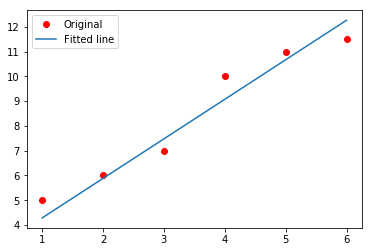

In [8]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(tranning_epochs):
        for (x,y) in zip(trainX,trainY):
            sess.run(optimizer,feed_dict={X:x,Y:y})
        if (epoch+1) % display_step == 0:
            c = sess.run(cost,feed_dict={X:trainX,Y:trainY})
            print "Epoch:","%04d"%(epoch+1),"cost=","{:.9f}".format(c),"W=",sess.run(W),"b=",sess.run(b)
    print "Optimization Finished"
    trainning_cost = sess.run(cost,feed_dict={X:trainX,Y:trainY})
    print "Trainning cost",trainning_cost,"W=",sess.run(W),"b=",sess.run(b)
    
    pl.plot(trainX,trainY,'ro',label='Original')
    pl.plot(trainX,sess.run(W)*trainX+sess.run(b),label='Fitted line')
    pl.legend()
    pl.show()